# Маркетинговое исследование приложения Procrastinate Pro+

Целью данного исследования является анализ логов приложения Procrastinate Pro+ с целью выявления причин убытков компании и отсутвия ожидаемого притока новых пользователей приложения не смотря на вложения в рекламу данного приложения.

В нашем распоряжении имеются логи сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Из документации к логам сервера нам известно что интересующая нас информация хранится в 3 таблицах:
<li>Таблица visits_log_short (лог сервера с информацией о посещениях сайта)</li>
<li>Таблица orders_log_short (информация о заказах)</li>
<li>Таблица costs_short (информация о затратах на маркетинг)</li>

Так же из документации к данных нам известно описание столбцов имеющихся в данных таблицах:

Таблица visits_log_short (лог сервера с информацией о посещениях сайта)содержит 6 столбцов:

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах) содержит 3 столбца:

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг) содержит 3 столбца:

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

На основании имеющихся данных мы сможем проанализоровать ситуацию с убытками компании для этого нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей. А так же дать ответы на следующие вопросы:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

А так же расчитаем LTV и ROI и при их помощи сможем:
- Проанализировать общую окупаемость рекламы;
- Проанализировать окупаемость рекламы с разбивкой по устройствам;
- Проанализировать окупаемость рекламы с разбивкой по странам;
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.

И ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.


## Изучение предоставленных данных

### Первичное ознакомление с данными

Перед ознакомлением с имеющимися данными подключим к нашему проекту все необходимые для нашего исследования библиотеки.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Посредством средств библиотеки pandas откроем имеющиеся таблицы `visits_log_short, orders_log_short, costs_short`, сохранив их в переменных `visits, orders, costs` соответсвенно для удобства работы с имеющимися данными. После чего ознакомимся с первыми 10 строками каждой из имеющихся таблиц и с общей информацией о них посредством метода `info()`.

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Ознакомимся с имеющимися таблицами и общей информацией о них из метода `info()` на основании чего составим таблицу необходимой первичной предобработки имеющихся данных. Для начала ознакомимся с таблицой `visits`.

In [3]:
display(visits.head(15))
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


На основании первичного ознакомления с данными  мы можем выявить следующий план первичной предобработки таблицы `visits`:
    <li>Следует произвести переименование столбцов данной таблицы в соответсвии с змеиным_регистром</li>
    <li>Следует произвести замены типов данных для столбцов Session Start и Session End с типа object  на ожидаемый для данных столбцов тип datetime(dt)</li>
    
Перейдем к первичному ознакомлению с таблицей `orders`.

In [4]:
display(orders.head(15))
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


На основании первичного ознакомления с данными  мы можем выявить следующий план первичной предобработки таблицы `orders`:
    <li>Следует произвести переименование столбцов данной таблицы в соответсвии с змеиным_регистром</li>
    <li>Следует произвести замены типов данных для столбца Event Dt с типа object  на ожидаемый для данног столбца тип datetime</li>

Перейдем к первичному ознакомлению с таблицей `costs`.

In [5]:
display(costs.head())
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


На основании первичного ознакомления с данными  мы можем выявить следующий план первичной предобработки таблицы `costs`:
    <li>Следует произвести переименование столбцов данной таблицы в соответсвии с змеиным_регистром</li>
    <li>Следует произвести замены типов данных для столбца dt с типа object  на ожидаемый для данног столбца тип datetime</li>

Исходя из первичного ознакомления с имеющимися исходными таблицами мы можем составить следующую таблицу первичной предобработки:

| Название таблицы    |Наименование столбцов     | Необходимая первичная  предобработка |
| --------------- |:-----------------------------------------------------------:|------------------------------------:|
| visits           |User Id, Region, Device, Channel, Session Start, Session End | Превести наименования к змеиному регистру|
| visits        |Session Start, Session End     | Произвести замену типа данных на datetime |
|orders        |User Id, Event Dt, Revenue       | Превести наименования к змеиному регистру |
|orders        |Event Dt        | Произвести замену типа данных на datetime |
|costs        |dt, Channel, costs         | Превести наименования к змеиному регистру|
|costs        |dt        | Произвести замену типа данных на datetime |

# Вывод по подразделу

В ходе данного подраздела мы произвели первичное ознакомление с данными в имеющихся таблицах, а также ознакомились с общей информацией  о имеющихся таблицах, на основании данного ознакомления нами была составлена таблица первичной предобработки имеющихся таблиц:

| Название таблицы    |Наименование столбцов     | Необходимая первичная  предобработка |
| --------------- |:-----------------------------------------------------------:|------------------------------------:|
| visits           |User Id, Region, Device, Channel, Session Start, Session End | Превести наименования к змеиному регистру|
| visits        |Session Start, Session End     | Произвести замену типа данных на datetime |
|orders        |User Id, Event Dt, Revenue       | Превести наименования к змеиному регистру |
|orders        |Event Dt        | Произвести замену типа данных на datetime |
|costs        |dt, Channel, costs         | Превести наименования к змеиному регистру|
|costs        |dt        | Произвести замену типа данных на datetime |

В следующем подразделе мы произведем первичную предобработку данных в таблицах на основании таблицы первичной предобработки данных.

### Первичная предобработка данных

На основании таблицы первичной предобработки данных составленной в предыдущем подразделе произведем необходимые манипуляции с имеющимися данными. Создадим цикл посредством которого мы приведем наименования столбцов исходных таблиц к змеиному регистру, а именно приведем все наименования к нижнему регистру и заменим пробелы между словами на нижнее подчеркивание. После чего приступим к замене типов данных на ожидаемые в столбцах которые этого требуют.

In [6]:
data = [visits, orders, costs]
for i in range(len(data)):
    data[i].columns = map(str.lower, data[i].columns)
    data[i].columns = data[i].columns.str.replace(' ','_')

В ходе выполнения цикла нами была устранена общая для таблиц проблема а именно нарушение змеиного регистра, перейдем к замене типов данных в столбцах этого требующих, после чего еще раз ознакомимся с данными в таблицах, чтобы проверить успешность проведения первичной предобработки таблиц.

In [7]:
dt = ['session_start', 'session_end', 'event_dt', 'dt']
for i in data:
    for b in dt:
        if b in i:
            i[b]= pd.to_datetime(i[b])


Выведем на экран общую информацию по таблицам и первые десять строк исследуемых таблиц для проверки успешности первичной предобработки.

In [8]:
for i in range(len(data)):
    display(data[i].head(10))
    display(data[i].info())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null datetime64[ns]
channel    1800 non-null object
costs      1800 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

Первичная предобработка проведена успешно, в следующем подразделе произведем более детальный анализ данных содержащихся в наших таблицах, с целью выявить возможные проблемы с имеющимися в таблицах данными.

# Выводы по подразделу

В ходе данного подраздела нами была произведена первичная предобработка исходных таблиц на основе таблицы необходимой первичной предобработки, для выполнения  поставленных  задач нами были написаны два цикла, цикл позволивший превести все строки к змеиному регистру и цикл производящий замену типа данных с object(str) на datetime в столбцах требующих данной замены. В следующем подразделе произведем подробное исследование имеющихся данных с целью выявления возможных проблем в исходных таблицах и устранение возможных дубликатов в данных.

В данном подразделе произведем подробное исследование имеющихся данных с целью выявления возможных проблем в исходных таблицах и устранение возможных дубликатов в данных. Начнем с изучения данных таблицы visits, для начала выведем на экран еще раз первые 10 строк данной таблицы и общую информацию по ней.

In [9]:
display(visits.head(10))
visits.info()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


В данной таблице неявные дубликаты могут присутвовать в столбцах region, device, channel для проверки данных столбцов на неявные дубликаты ознакомимся с списками уникальных значений для данных столбцов.

In [10]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

С столбцом region таблицы visits все нормально неявных дубликатов не выявелено, ознакомимся с списком уникальных значений столбца device.

In [11]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

С столбцом device таблицы visits все нормально неявных дубликатов не выявелено, ознакомимся с списком уникальных значений столбца channel.

In [12]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

С столбцом channel таблицы visits все нормально неявных дубликатов не выявелено, перейдем к изучению данных таблицы orders.

In [13]:
display(orders.head(10))
orders.info()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


В столбцах данной таблицы возникновение неявных дубликатов не может произойти в виду информации содержащейся в данной таблице, ознакомимся с таблицей costs.

In [14]:
display(costs.head(10))
costs.info()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null datetime64[ns]
channel    1800 non-null object
costs      1800 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


В данной таблице неявные дубликаты могут присутвовать в столбце channel для проверки данного столбца на неявные дубликаты ознакомимся с списком уникальных значений для данного столбца.

In [15]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

С столбцом channel таблицы costs все нормально неявных дубликатов не выявелено, проверим данные таблицы на полные дубликаты и в случае если такие имеются удалим их из таблицы.

In [16]:
for i in range(len(data)):
    data[i]= data[i].drop_duplicates()
    display(data[i].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 16.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null datetime64[ns]
channel    1800 non-null object
costs      1800 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 56.2+ KB


None

В данных таблицах полных дубликатов не выявлено. Предобработка данных таблиц завершена в следующем разделе мы приступим к подготовке нашего исследования а именно зададим функции для расчета и анализа LTV, ROI, удержания и конверсии.

#  Вывод по разделу

В ходе первого подраздела данного раздела мы произвели первичное ознакомление с данными в имеющихся таблицах, а также ознакомились с общей информацией  о имеющихся таблицах, на основании данного ознакомления нами была составлена таблица первичной предобработки имеющихся таблиц:

| Название таблицы    |Наименование столбцов     | Необходимая первичная  предобработка |
| --------------- |:-----------------------------------------------------------:|------------------------------------:|
| visits           |User Id, Region, Device, Channel, Session Start, Session End | Превести наименования к змеиному регистру|
| visits        |Session Start, Session End     | Произвести замену типа данных на datetime |
|orders        |User Id, Event Dt, Revenue       | Превести наименования к змеиному регистру |
|orders        |Event Dt        | Произвести замену типа данных на datetime |
|costs        |dt, Channel, costs         | Превести наименования к змеиному регистру|
|costs        |dt        | Произвести замену типа данных на datetime |

В ходе второго подраздела данного раздела нами была произведена первичная предобработка исходных таблиц на основе таблицы необходимой первичной предобработки, для выполнения поставленных задач нами были написаны два цикла, цикл позволивший превести все строки к змеиному регистру и цикл производящий замену типа данных с object(str) на datetime в столбцах требующих данной замены.

В третьем подразделе нами было произведено более подробное ознакомление с данными содержащимися в наших таблицах с целью проверки данных столбцов на неявные дубликаты и таблиц на наличие полных дубликатов. В ходе данной проверки в исходных данных нами небыло выявлено неявных дубликатов, а так же полных дубликатов в наших таблицах.

После знакомства с иходными данными и устранения имеющихся в данных проблем, можно приступать к исследовательскому анализу данных, но прежде чем искать ответы на интересующие в ходе данного исследования нас вопросы, в следующем разделе мы подготовим необходимые для исследовательского анализа функции которые позволят нам перейти к поиску ответов на интересующие нас вопросы.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

Целью нашего исследования является проанализировать бизнес показатели нашей компании найти причины убытков компании и дать ответы на следующие вопросы:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?
- Проанализировать общую окупаемость рекламы;
- Проанализировать окупаемость рекламы с разбивкой по устройствам;
- Проанализировать окупаемость рекламы с разбивкой по странам;
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Для ответа на вопросы маркетингового и исследовательского анализа исходя из данных нашей компании, нам необходимо расчитать и проанализировать следующие бизнес-метрики:
- Конверсию
- Удержание
- LTV
- ROI

Чтобы произвести расчеты данных бизнес-метрик а так же произвести их анализ, нам потребуется разбить наших пользователей на когорты после чего мы сможем произвести когорный анализ интересующих нас метрик. Для облегчения работы с данными метриками мы создадим функции которые позволят расчитать и проанализировать интересующие нас метрики, а так же функции которые позволят нам произвести визуализацию полученных нами данных, что позволит облегчить анализ интересующих нас метрик и позволит дать более полные ответы на интересующие нас вопросы, в ходе данного раздела мы создадим данные функции а именно :
1. Функцию get_profiles - функция для создания пользовательских профилей
2. Функцию get_retention - функция для расчёта удержания
3. Функцию get_conversion - функция для расчёта конверсии
4. Функцию get_ltv - функция для расчёта LTV и ROI
5. Функцию plot_retention - функция для визуализации удержания
6. Функцию plot_conversion - функция для визуализации конверсии
7. Функцию plot_ltv_roi - функция для визуализации LTV и ROI

### Функция get_profiles()

Для расчета интересующих нас бизнес-метрик нам следует выделить пользовательские профили для этого создадим функцию get_profiles, ее задачей будет создать таблицу с деталями первого скачивания приложения каждого пользователя, такими как источник перехода на скачивание приложения, страна, устройство. Все необходимые данные для создания профилей у нас имеются в исходных таблицах. Перейдем непосредственно к созданию функции.

In [17]:
def get_profiles(visits, orders, ad_costs):
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs['dt']=ad_costs['dt'].dt.date
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Результатом выполнения данной функции будет таблица содержащая профили пользователей необходимых нам для когортного анализа и анализа бизнес-метрик, на основании данных профилей мы можем провести когортный анализ а именно выяснить качество привлекаемых клиентов посредством расчета и анализа коэффициента удержания, рассчитать и проанализировать конверсию, а так же произвести расчеты и анализ таких бизнес-метрик как LTV и ROI. Для проведения когортного анализа и анализа интересующих метрик мы напишем дополнительные функции которые будут получать пользовательские профили и дополнительную информацию из исходных таблиц для расчета и последуещего анализа интересующих нас метрик, а так же далее нами будут описаны функции которые позволят визуализировать полученные в ходе расчетов данные по исследуемым метрикам. В следующем подразделе нами будет создана функция get_retention для расчета коэффициента удержания.

### Функция get_retention()

В данном подразделе нами будет создана функция get_retention, задачей которой будет расчет на основании пользовательских профилей, заданного момента анализа и горизонта анализа произвести расчет когортного анализа на предмет коэффициентов удержания пользователей в нашем приложении.

In [18]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Выше нами была создана функция get_retention которая позволит нам произвести расчеты коэффициентов удержания пользователей в нашем приложении, в результате выполнения данной функции мы сможем получить таблицы с сырыми данными, сгруппированными на основании интересующего нас фактора указанного в dimensions(по умолчанию будут выводится данные сгруппированные по платящий пользователь или нет), а так же получим сгруппированные сырые данные по фактору указанному в dimensions и распределенному по временному интервалу, что позволит нам проанализировать коэффициен удержания пользователей нашим приложениием. В следующем подразделе нами будет создана функция которая позволит нам произвести расчеты конверсии нашего приложения - функция get_conversion.

### Функция get_conversion()

Целью данного подраздела является создание функции для расчета конверсии, данной функции будут передаваться пользовательские профили а так же информация из таблицы orders что позволит нам расчитать такую бизнес-метрику как конверсия.

In [19]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Результатом работы созданной нами функции get_conversion мы получим на основе пользовательских профилей и информации из таблицы orders мы получим три таблицы с конверсией, таблицу с сырыми данными, таблицу конверсии сгруппированной по интересующим нас фактором и сгруппированную таблицу по исследуемому фактору с распределением по времени. В следующем подразделе нами будет описана функция get_ltv которая позволит нам рассчитать такие бизнес-метрики как LTV и ROI.

### Функция get_ltv()

В данном подразделе мы опишем функцию get_ltv необходимую нам для расчетов  таких бизнес-метрик как LTV и ROI, на основании пользовательских профилей и данных о заказах мы расчитаем "пожизненную ценность" пользователей и затраты нашей компании на рекламу так называемую метрику окупаемости инвестиций.

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Результатом работы данной функции будет таблица сырых данных, таблица с метрикой LTV, таблица динамики LTV, таблица ROI и таблица динамики ROI. На этом функции необходимые нам для расчетов интересующих нас бизнес-метрик описаны, но работать с просто таблицами данными не всегда удобно, в следующих подразделах нами будут описаны функции для визуализации полученных данных функций описанных выше. Для начала опишем функцию для визуализации коэффициентов удержания.

### Функции визуализации

В ходе данного подраздела нами будут описаны функции для визуализации данных полученных в результате работы функций описанных в предыдущих подразделов, а именно для визуализации коэффициентов удержания полученных в ходе работы функции get_retention будет функция визуализации plot_retention, для функции конверсии get_conversion - plot_conversion, а для визуализации бизнес-метрик LVT и ROI полученных из функции get_ltv - plot_ltv_roi. Создадим функцию визуализации plot_retention.

In [21]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

После создания функции визуализации plot_retention, перейдем к созданию функции для визуализации конверсии plot_conversion.

In [22]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Далее создадим функцию для визуализации бизнес-метрик LVT и ROI, функию plot_ltv_roi

In [23]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Для корректного отображения графиков и уменьшения шумов в данных создадим функцию скользящего среднего для фильтрации данных и улучшения читаемости графиков, функцию фильтрации filter_data.

In [24]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

# Вывод по разделу

В ходе данного раздела нами были созданы функции для расчета и последующего анализа следующих метрик, коэффициента удержания, конверсии, LTV и ROI, а так же созданы функции для визуализации полученных данных:
1. Функция get_profiles - функция для создания пользовательских профилей
2. Функция get_retention - функция для расчёта удержания
3. Функция get_conversion - функция для расчёта конверсии
4. Функция get_ltv - функция для расчёта LTV и ROI
5. Функция plot_retention - функция для визуализации удержания
6. Функция plot_conversion - функция для визуализации конверсии
7. Функция plot_ltv_roi - функция для визуализации LTV и ROI
А так же нами была создана фильтрующая функция filter_data, для уменьшения возможных шумов на графиках, основывающаяся на применении скользящего среднего, что позволит сгладить графики при этом не сильно исказив имеющиеся данные.

После создания всех необходимых для расчетов функций можно приступать к исследовательскому анализу данных и ответу на интересующие нас вопросы.

## Исследовательский анализ данных

В ходе данного раздела мы исследуем имеющиеся у нас данные воспользовавщись функциями описанными в предыдущем разделе, а так же дадим ответы на следующие вопросы:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?
Для работы с нашими данными и поиска ответов на интересующие нас вопросы для начала создадим пользовательские профили посредством функции get_profiles, результат работы данной функции сохраним в переменную profiles. После чего определим минимальную и максимальную даты привлечения пользователей после чего приступим к поиску ответов на интересующие нас вопросы.

In [25]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Мы получили пользовательские профили теперь определим максимальную и минимальную даты привлечения пользователей в приложение нашей компанией. Для этого применим функции min() и max() к столбцу first_ts.

In [26]:
print('Минимальная дата привлечения пользователя',profiles['first_ts'].min())
print('Максимальная дата привлечения пользователя',profiles['first_ts'].max())

Минимальная дата привлечения пользователя 2019-05-01 00:00:41
Максимальная дата привлечения пользователя 2019-10-27 23:59:04


Минимальная дата привлечения пользователя 1 мая 2019 года, а максимальная дата 27 октября 2019, как и было указано в документации к исходным данным изначальный срез данных верен. Зададим для нашего исследования момент и горизонт анализа, моментом анализа является актуальная дата анализа, а горизонтом является параметр "жизни" пользователя, для нашего отчета горизонтом анализа является срок в 14 дней, то есть пользователь должен пользоваться услугами нашего приложения 14 дней.

In [27]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Проверив временной диапазон данных, и задав момент и горизонт анализа с подготовкой закончили, приступим к поиску ответов на интересующие нас вопросы. Первый интересующий вопрос звучит так: "Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?". Для ответа на данный вопрос обратимся к нашей функции конверсии передав в качестве  параметра dimensions столбец `region`. Параметр dimensions по умолчанию делит пользователей на платящих и нет, а дополнив его разделением на страны мы сможем получить сразу ответы на вопросы из каких стран приходят посетители и какие страны дают больше платящих пользователей применим функцию get_conversion с доп параметром dimensions и получим ответ на первый интересующий нас вопрос.

In [28]:
cr_raw_country, cr_group_country, cr_time_country = get_conversion(profiles,
                                                            orders,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['region']
                                                        )

После получения результатов работы функции get_conversion, ознакомимся с результатами ее работы нас интересует значения таблицы cr_group_country в ней содержатся данные пользователей сгруппированных по двум параметрам: платежей и стран. Для более точного анализа ответа на интересующий нас вопрос помимо результатов работы функции get_conversion вызовем функцию визуализации plot_conversion, после анализа результатов которой мы сможем дать ответ на интересующий нас вопрос.

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,16624,0.024362,0.028152,0.030618,0.032122,0.033446,0.034288,0.034889,0.035190,0.035671,0.036153,0.036273,0.036634,0.036754,0.036814
Germany,14244,0.025274,0.030890,0.033418,0.035383,0.036226,0.037209,0.037770,0.038472,0.039034,0.039385,0.039455,0.039525,0.039596,0.040017
UK,16710,0.025913,0.029922,0.032615,0.033872,0.035009,0.035667,0.036505,0.037044,0.037283,0.037642,0.037882,0.037941,0.038061,0.038121
United States,95042,0.048799,0.055270,0.058206,0.060436,0.062057,0.063035,0.063867,0.064687,0.065308,0.065876,0.066223,0.066497,0.066697,0.066949


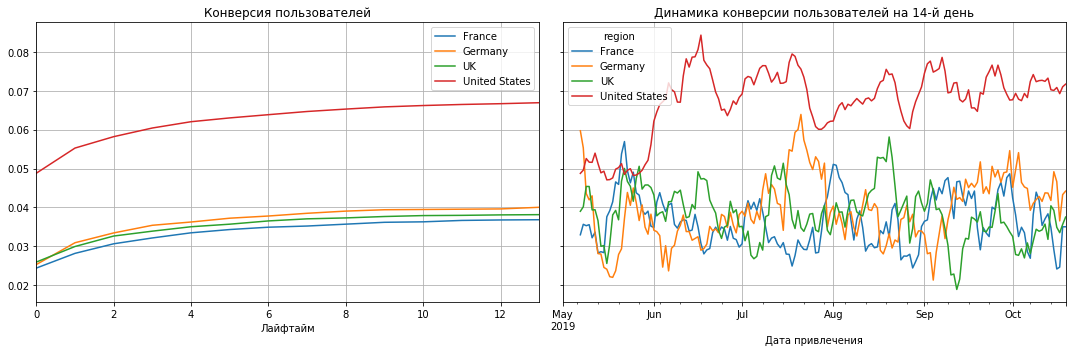

In [29]:
display(cr_group_country)
plot_conversion(cr_group_country, cr_time_country, horizon_days, window=7)

Полученные в результате работы функции get_conversion данные и графики полученые в результате работы функции визуализации plot_conversion, позволяют оценить нам как выглядит ситуация с пользователями "прожившими"(использовавшиими) наше приложение на протяжении исследуемого периода принятого в нашей компании, а именно 14 дней, однако чтобы понять полную ситуацию с пользователями использующих наше приложение, следует так же посмотреть на ситуацию не только со стороны пользователей использующих наше приложение 14 дней но и учесть пользователей которые не успели использовать данное приложение на протяжении 14 дней, то есть нам следует ознакомится так же с данными абсолютной конверсии за весь период.
Для исследования абсолютной конверсии за  весь период обратимся к пользовательским профилям, и на основании полученных нами пользовательских данных произведем расчеты, сколько всего пользователей соответсвуют исследуемому параметру, сколько из них являются платящими, и какую часть от всех пользователей они составляют. На основании полученных данных за весь период и горизонт анализа, мы сможем дать ответы на интересующие нас вопросы.

In [30]:
country = (
    profiles.groupby('region')
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
country.columns = ['total_users', 'paying_users', 'paying_share_%']
country['paying_share_%'] = (country['paying_share_%'] *100)
country.sort_values(by='paying_share_%', ascending=False)


,total_users,paying_users,paying_share_%
region,,,
United States,100002,6902.0,6.901862
Germany,14981,616.0,4.111875
UK,17575,700.0,3.982930
France,17450,663.0,3.799427


Приступим к ответу на вопросы `Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?`. Исходя из данных соответсвующих горизонту анализа и абсолютной конверсии ответом на вопрос `Из каких стран приходят посетители?` является следующий список стран:
- Франция
- Германия
- Великобритания
- США

Ответ на следующую часть интересующего нас вопроса:`Какие страны дают больше всего платящих пользователей?` мы можем получить из таблицы абсолютной конверсии за весь период имеющихся данных а именно :
- Больше всего пользователей нашего приложения находятся в США их 100002 платящих из них 6902, что составляет 6.9% от всех пользователей из США
- Вторыми по процентному соотношению платящих к неплатящим пользователей является Германия, пользователей из Германии нашего приложения 616 что приблизительно 4.1%, однако не смотря на высокий уровень конверсии, Германия занимает последнее место по количеству платящих пользователей.
- Третьеми по процентному соотношению платящих к неплатящим пользователей является группа пользователей из Великобритании, их колчество 17575, платящих из них 700, что приблизительно составляет 3.9 % от всех пользователей из Великобритании, однако по количеству платящих пользователей они занимают второе место.
- Наименьшее по процентному соотношению платящих к неплатящим пользователей нашего приложения приходяттся на пользователей из Франции их 17450, платящих из них 663 платящих пользователей, что составляет 3.7%.

Проанализировав таблицу и графики конверсии с учетом горизонта анализа мы можем увидеть что порядок стран по процентному соотношению платящих к неплатящим пользователей сохраняятся. Конверсию по странам можно распределить в следующем порядке от большей к меньшей США, Германия, Великобритания, Франция. Однако ответом на вопрос `Какие страны дают больше всего платящих пользователей?` будет следующий порядок стран, если анализировать только количество платящих пользователей за весь период то по количеству принесенных платящих пользователей страны можно выстроить в следующем порядке:
- США
- Великобритания
- Франция
- Германия

Исходя из полученной информации мы получили порядок стран, по количеству платящих пользователей, однако исследовав так же конверсии данных стран, нам кажется что следует делать акцент рекламных компаний по поиску целевой  аудитории, с целью увелечения прибыли компании в следующем порядке, США, Германия, Великобритания, Франция. Акцентирование на странах в данном порядке исходя из доли пользователей которые решаются на покупках позволит при увелечении количества пользователей из стран в таком порядке увеличить прибыль нашей компании.

Ответив на первый интересующий нас вопрос перейдем к следующему, а именно к вопросу `Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?` Для ответа на данный вопрос так же обратимся к конверсии, отобразим таблицу конверсии и визиализируем ее, для получения ответа на данный вопрос передадим в качестве фактора группировки в dimensions столбец `device`, а так же построим таблицу абсолютной конверсии за весь временной период, на основе данных таблиц и графикой дадим ответ на интересующий нас вопрос.

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,33288,0.040675,0.046593,0.049597,0.051400,0.052932,0.053803,0.054704,0.055275,0.055696,0.056267,0.056537,0.056837,0.057138,0.057258
Mac,28588,0.044494,0.050861,0.053764,0.055723,0.056912,0.057961,0.058731,0.059431,0.060025,0.060690,0.061075,0.061214,0.061284,0.061634
PC,28978,0.033508,0.038685,0.040928,0.042688,0.044309,0.045241,0.046104,0.046829,0.047415,0.047795,0.048002,0.048140,0.048278,0.048554
iPhone,51766,0.043252,0.048970,0.051926,0.054225,0.055674,0.056562,0.057219,0.058030,0.058629,0.059093,0.059363,0.059672,0.059827,0.060020


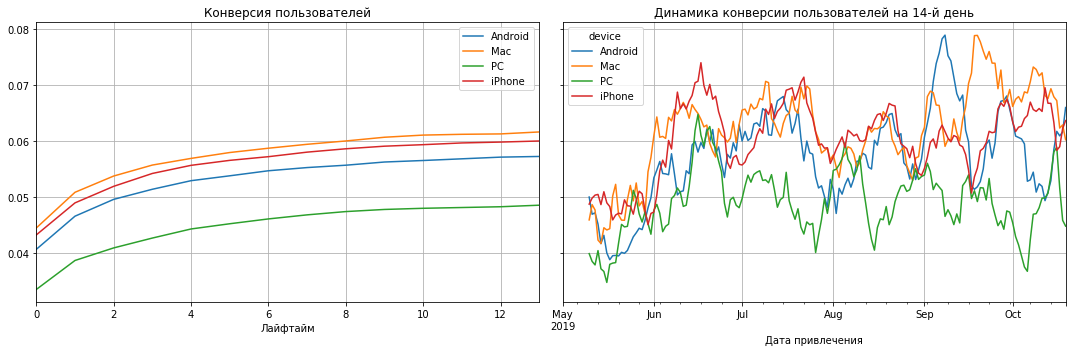

In [31]:
cr_raw_device, cr_group_device, cr_time_device = get_conversion(profiles,
                                                            orders,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['device']
                                                        )
display(cr_group_device)
plot_conversion(cr_group_device, cr_time_device, horizon_days, window=10)

Так же построим таблицу абсолютной конверсии за весь период.

In [32]:
devices = (
    profiles.groupby('device')
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
devices.columns = ['total_users', 'paying_users', 'paying_share_%']
devices['paying_share_%'] = (devices['paying_share_%'] *100)
devices.sort_values(by='paying_share_%', ascending=False)


,total_users,paying_users,paying_share_%
device,,,
Mac,30042,1912.0,6.364423
iPhone,54479,3382.0,6.207897
Android,35032,2050.0,5.851793
PC,30455,1537.0,5.046790


Приступим к ответу на вопросы `Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи`. Исходя из имющихся данных ответом на вопрос `Какими устройствами они пользуются?` является следующий список устройств:
- Android
- Mac	
- PC	
- iPhone

Ответом на вопрос `С каких устройств чаще всего заходят платящие пользователи` исходя из данных о абсолютной конверсии будет следующим:
- Наибольшее число платящих пользователей  нам принесла платформа iPhone, общее число пользователей данного устройства 54479, платящих из них 3382, конверсия данного устройства 6.2%
- Вторым по количеству платящих пользователей является  устройства на платформе Android, число пользователей данного устройства 35032, платящих из них 2050, конверсия 5.85%
- Третьими по количеству платящих пользователей являются пользователи Mac, всего пользователей данного устройства 30042, платящих из них 1912, конверсия = 6.36%
- Наименьшее число платящих пользователей принесла нам платформа PC, всего пользователей данной платформы 30455, платящих из них 1537, а конверсия = 5.04%

Исходя из полученных данных абсолютной таблицы и таблицы конверсии с графиками с учетом горизонта анализа, мы можем сделать следующие выводы:
- По количеству платящих пользователей устройства идут в следующем порядке iPhone, Android, Mac, PC
- По доле платящих клиентов мы можем увидеть следующий порядок Mac, iPhone, Android, PC.

В данном сегменте мы можем выделить, что в данном параметре у нашей компании нет критичных проблем, и если выделять порядок целевой аудитории то следует обращаться к списку доли платящих клиентов и на основании его делать акценты рекламных компаний.

Следующим интересующим нас вопросм является : `По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?` Обратимся к функции конверсии еще раз для ответа на данный вопрос в качестве фактора dimensions столбец `channel`

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.086980,0.094003,0.096704,0.100486,0.102107,0.103998,0.105348,0.105348,0.105889,0.106159,0.106159,0.106969,0.107509,0.107509
FaceBoom,27544,0.102091,0.109134,0.111494,0.113346,0.114762,0.115452,0.116468,0.116976,0.117557,0.118175,0.118465,0.118864,0.119082,0.119373
LeapBob,8103,0.016660,0.020610,0.024065,0.025052,0.026040,0.026657,0.026904,0.027644,0.028261,0.028631,0.028878,0.029002,0.029125,0.029248
MediaTornado,4167,0.023278,0.027358,0.028078,0.029998,0.030478,0.031198,0.031198,0.032397,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
OppleCreativeMedia,8139,0.017324,0.019904,0.021501,0.023099,0.023713,0.024573,0.025310,0.025556,0.025556,0.025802,0.025925,0.026047,0.026047,0.026293
RocketSuperAds,4251,0.034110,0.047283,0.053870,0.059280,0.063750,0.065632,0.067278,0.068690,0.069866,0.071513,0.072924,0.073159,0.073394,0.073630
TipTop,18498,0.056709,0.069413,0.076062,0.080711,0.084171,0.086604,0.087685,0.089361,0.090550,0.091577,0.092334,0.092767,0.093199,0.093740
WahooNetBanner,8082,0.031180,0.038481,0.043306,0.045038,0.046894,0.048008,0.048874,0.049740,0.050359,0.051101,0.051472,0.051596,0.051720,0.052091
YRabbit,4102,0.025841,0.028766,0.031204,0.032179,0.033398,0.034130,0.034861,0.035349,0.035836,0.036324,0.036324,0.036568,0.036811,0.037055


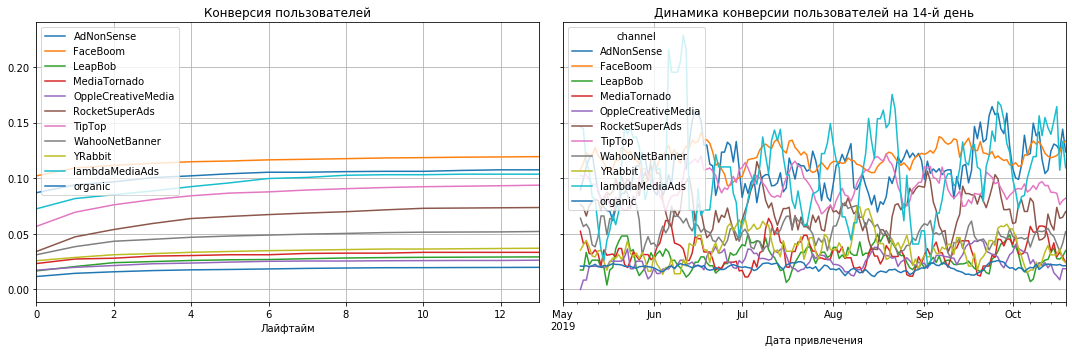

In [33]:
cr_raw_channel, cr_group_channel, cr_time_channel = get_conversion(profiles,
                                                            orders,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['channel']
                                                        )
display(cr_group_channel)
plot_conversion(cr_group_channel, cr_time_channel, horizon_days, window=7)

In [34]:
channel = (
    profiles.groupby('channel')
    .agg({'user_id': 'count', 'payer': ['sum', 'mean']}) 
)
channel.columns = ['total_users', 'paying_users', 'paying_share_%']
channel['paying_share_%'] = (channel['paying_share_%'] *100)
channel.sort_values(by='paying_share_%', ascending=False)


,total_users,paying_users,paying_share_%
channel,,,
FaceBoom,29144,3557.0,12.204914
AdNonSense,3880,440.0,11.340206
lambdaMediaAds,2149,225.0,10.469986
TipTop,19561,1878.0,9.600736
RocketSuperAds,4448,352.0,7.913669
WahooNetBanner,8553,453.0,5.296387
YRabbit,4312,165.0,3.826531
MediaTornado,4364,156.0,3.574702
LeapBob,8553,262.0,3.063253


Приступим к ответу на вопросы `По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?`. Исходя из имющихся данных ответом на вопрос `По каким рекламным каналам шло привлечение пользователей?` является следующий список рекламных каналов:
- AdNonSense 
- FaceBoom 
- LeapBob 
- MediaTornado 
- OppleCreativeMedia 
- RocketSuperAds 
- TipTop 
- WahooNetBanner 
- YRabbit 
- lambdaMediaAds

А ответом на вопрос `Какие каналы приносят больше всего платящих пользователей?` можем выделить следующий список рекламных компаний по количеству платящих компаний:
- FaceBoom
- TipTop
- organic
- WahooNetBanner
- AdNonSense
- RocketSuperAds
- LeapBob
- OppleCreativeMedia
- lambdaMediaAds
- YRabbit
- MediaTornado

Однако по доле платящих клиентов мы можем составить следующий порядок :
- FaceBoom	
- AdNonSense
- lambdaMediaAds
- TipTop
- RocketSuperAds
- WahooNetBanner
- YRabbit
- MediaTornado
- LeapBob
- OppleCreativeMedia
- organic

Для дачи рекомендаций по данному параметру следует провести дополнительное исследование каналов привлечения клиентов и уже на результатах данного анализа стоимости привлечения следует давать рекомендации рекламному отделу.
В следующем разделе мы произведем маркетинговый анализ где проведем анализ рекламных каналов с целью расчитать рекламные затраты компании

# Вывод по разделу

В ходе данного раздела мы исследовали имеющиеся у нас данные воспользовавщись функциями описанными во втором разделе, а так же дали ответы на следующие вопросы:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Для работы с нашими данными и поиска ответов на интересующие нас вопросы мы создали пользовательские профили посредством функции get_profiles, результат работы данной функции сохранили в переменную profiles. После чего определили минимальную и максимальную даты привлечения пользователей.
Ответом на вопросы `Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?`. Исходя из данных соответсвующих горизонту анализа и абсолютной конверсии ответом на вопрос `Из каких стран приходят посетители?` является следующий список стран:
- Франция
- Германия
- Великобритания
- США

Ответ на следующую часть интересующего нас вопроса:`Какие страны дают больше всего платящих пользователей?` мы можем получить из таблицы абсолютной конверсии за весь период имеющихся данных а именно :
- Больше всего пользователей нашего приложения находятся в США их 100002 платящих из них 6902, что составляет 6.9% от всех пользователей из США
- Вторыми по процентному соотношению платящих к неплатящим пользователей является Германия, пользователей из Германии нашего приложения 616 что приблизительно 4.1%, однако не смотря на высокий уровень конверсии, Германия занимает последнее место по количеству платящих пользователей.
- Третьеми по процентному соотношению платящих к неплатящим пользователей является группа пользователей из Великобритании, их колчество 17575, платящих из них 700, что приблизительно составляет 3.9 % от всех пользователей из Великобритании, однако по количеству платящих пользователей они занимают второе место.
- Наименьшее по процентному соотношению платящих к неплатящим пользователей нашего приложения приходяттся на пользователей из Франции их 17450, платящих из них 663 платящих пользователей, что составляет 3.7%.

Проанализировав таблицу и графики конверсии с учетом горизонта анализа мы можем увидеть что порядок стран по процентному соотношению платящих к неплатящим пользователей сохраняятся. Конверсию по странам можно распределить в следующем порядке от большей к меньшей США, Германия, Великобритания, Франция. Однако ответом на вопрос `Какие страны дают больше всего платящих пользователей?` будет следующий порядок стран, если анализировать только количество платящих пользователей за весь период то по количеству принесенных платящих пользователей страны можно выстроить в следующем порядке:
- США
- Великобритания
- Франция
- Германия

Исходя из полученной информации мы получили порядок стран, по количеству платящих пользователей, однако исследовав так же конверсии данных стран, нам кажется что следует делать акцент рекламных компаний по поиску целевой  аудитории, с целью увелечения прибыли компании в следующем порядке, США, Германия, Великобритания, Франция. Акцентирование на странах в данном порядке исходя из доли пользователей которые решаются на покупках позволит при увелечении количества пользователей из стран в таком порядке увеличить прибыль нашей компании.

Ответив на первый интересующий нас вопрос мы перешли к следующему, а именно к вопросу `Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?` Исходя из имющихся данных ответом на вопрос `Какими устройствами они пользуются?` является следующий список устройств:
- Android
- Mac	
- PC	
- iPhone

Ответом на вопрос `С каких устройств чаще всего заходят платящие пользователи` исходя из данных о абсолютной конверсии будет следующим:
- Наибольшее число платящих пользователей  нам принесла платформа iPhone, общее число пользователей данного устройства 54479, платящих из них 3382, конверсия данного устройства 6.2%
- Вторым по количеству платящих пользователей является  устройства на платформе Android, число пользователей данного устройства 35032, платящих из них 2050, конверсия 5.85%
- Третьими по количеству платящих пользователей являются пользователи Mac, всего пользователей данного устройства 30042, платящих из них 1912, конверсия = 6.36%
- Наименьшее число платящих пользователей принесла нам платформа PC, всего пользователей данной платформы 30455, платящих из них 1537, а конверсия = 5.04%

Исходя из полученных данных абсолютной таблицы и таблицы конверсии с графиками с учетом горизонта анализа, мы можем сделать следующие выводы:
- По количеству платящих пользователей устройства идут в следующем порядке iPhone, Android, Mac, PC
- По доле платящих клиентов мы можем увидеть следующий порядок Mac, iPhone, Android, PC.

В данном сегменте мы можем выделить, что в данном параметре у нашей компании нет критичных проблем, и если выделять порядок целевой аудитории то следует обращаться к списку доли платящих клиентов и на основании его делать акценты рекламных компаний.

Следующим вопросм на который мы ответили был вопрос : `По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?`. Исходя из имющихся данных ответом на вопрос `По каким рекламным каналам шло привлечение пользователей?` является следующий список рекламных каналов:
- AdNonSense 
- FaceBoom 
- LeapBob 
- MediaTornado 
- OppleCreativeMedia 
- RocketSuperAds 
- TipTop 
- WahooNetBanner 
- YRabbit 
- lambdaMediaAds

А ответом на вопрос `Какие каналы приносят больше всего платящих пользователей?` можем выделить следующий список рекламных компаний по количеству платящих компаний:
- FaceBoom
- TipTop
- organic
- WahooNetBanner
- AdNonSense
- RocketSuperAds
- LeapBob
- OppleCreativeMedia
- lambdaMediaAds
- YRabbit
- MediaTornado

Однако по доле платящих клиентов мы можем составить следующий порядок :
- FaceBoom	
- AdNonSense
- lambdaMediaAds
- TipTop
- RocketSuperAds
- WahooNetBanner
- YRabbit
- MediaTornado
- LeapBob
- OppleCreativeMedia
- organic

Для дачи рекомендаций по данному параметру следует провести дополнительное исследование каналов привлечения клиентов и уже на результатах данного анализа стоимости привлечения следует давать рекомендации рекламному отделу.

В следующем разделе мы произведем маркетинговый анализ где проведем анализ рекламных каналов с целью расчитать рекламные затраты компании

## Маркетинговое исследование приложения Procrastinate Pro+

Целью маркетингового исследования приложения, является поиск ответов на следующие вопросы:
- Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам. Визуализировать изменения метрик во времени.
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Для ответа на первый интересующий вопрос мы воспользуемся данными из  таблицы costs, для этого создадим ее копию в переменной marketing, и произведем необходимые расчеты используя данную копию.

In [35]:
marketing = costs.groupby(['channel']).agg({'sum'})
display(marketing)
print('Общая сумма затрат на рекламную компанию =', costs['costs'].sum().round(2))

,costs
,sum
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00


Общая сумма затрат на рекламную компанию = 105497.3


Мы получили общую сумму затрат на рекламную компанию = 105497.3, а так же затраты на каждый рекламный канал за весь исследуемый период, исходя из полученных данных самым дешёвым рекламным каналом был YRabbit, а самым дорогим TipTop. Посмотрим как распределялись затраты компании по времени и как распределялся бюджет среди рекламных каналов.

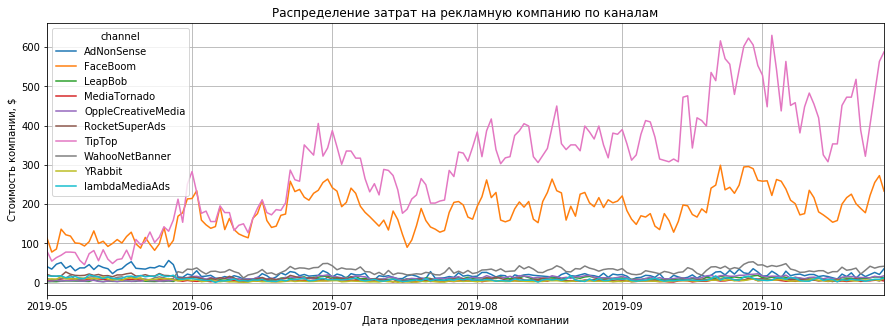

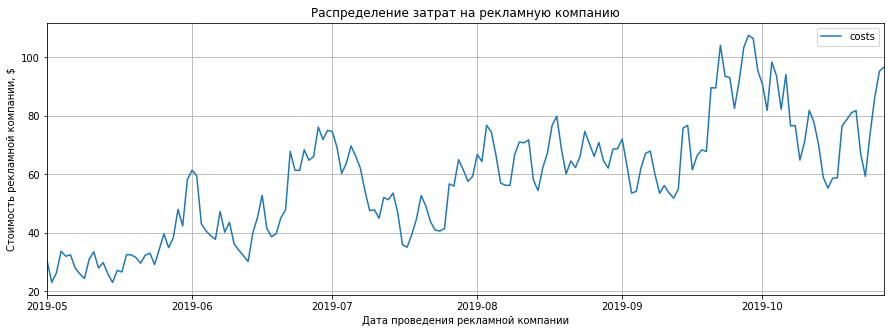

In [36]:
marketing =costs.pivot_table( 
    index='dt', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(15, 5))
plt.ylabel('Стоимость компании, $')
plt.xlabel('Дата проведения рекламной компании')
plt.title('Распределение затрат на рекламную компанию по каналам')
plt.show()
marketing =costs.pivot_table( 
    index='dt', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(15, 5))
plt.ylabel('Стоимость рекламной компании, $')
plt.xlabel('Дата проведения рекламной компании')
plt.title('Распределение затрат на рекламную компанию')
plt.show()

Изучив графики распределения затрат на рекламную компанию мы можем увидеть что затраты на рекламную компанию растут с каждым месяцем, а самый затратный период был в конце сентября.

Приступим к поиску ответов на следующий интересующий нас вопрос: 
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Для ответа на данный вопрос воспользуемся пользовательскими профилями и расчитаем такой параметр как cac. Исходя из данного параметра мы сможем узнать сколько стоило привлечение одного пользователя всреднем  из всех рекламных компаний, а так же сколько стоило привлечение одного пользователя в среднем за все время, а так же визуализировать динамику сас по всем каналам в частности и в целом. Для расчета данного параметра исключим бесплатных пользователей из данного списка, тоесть исключим пользовательские профили из канала organic.

In [37]:
cac = profiles.query('channel != "organic"')

Мы получили пользовательские профили без канала organic, произведем расчет средних  затрат на привлечение пользователей за все время, для разных каналов, и всреднем на все каналы.

In [38]:
display(cac.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean'))
print('Средняя стоимость привлечения одного пользователя за все время =',cac['acquisition_cost'].mean())

,acquisition_cost
channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


Средняя стоимость привлечения одного пользователя за все время = 1.1274813239427588


Ответом на интересующий нас вопрос мы можем получить исходя из полученных данных, средняя стоимость привлечения одного пользователя стоила компании около `1.13 $` так же мы можем увидеть что диапазон разброса стоимости одного пользователя по рекламным колеблется от` 0.2 $` до `2.8 $` за одного пользователя, построим графики динамики изменения стоимости привлечения одного пользоватля по времени, и ознакомимся как менялась стоимость привлечения пользователей.

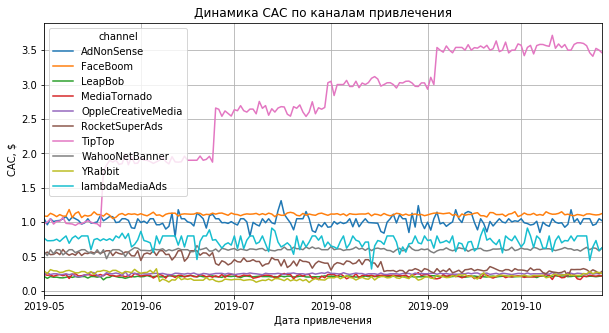

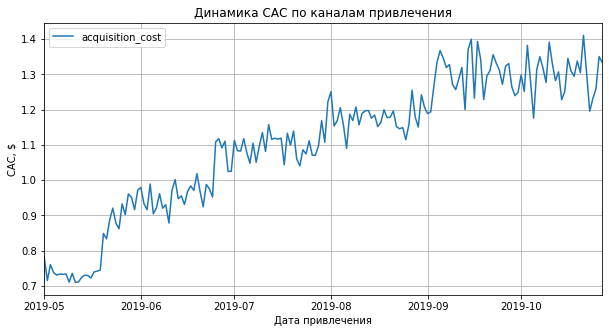

In [39]:
cac.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()
cac.pivot_table(
    index='dt', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Исходя из графиков динамики CAC мы можем наблюдать скачек средней стоимости привлечения одного пользователя для компании с 2 половины мая, на данную стоимость влияет 1 из рекламных компаний, а именно рекламная компания TipTop, если для остальных компаний мы можем наблюдать тенденцию колебания стоимости привлечения одного клиента в пределах средней стоимости привлечения клиента, то стоимость привлечения пользователя в данной  компании увеличивалось каждый месяц, скорее всего чрезмерный рост стоимости привлечения клиентов и является причиной убытков компании в следующем разделе мы произведем анализ окупаемости рекламных компаний, и сможем дать более развернутый ответ является ли это причиной убытков компании.

# Выводы по разделу

В данном разделе нами было произведено маркетинговое исследования приложения в ходе которого мы ответили на следующие вопросы:
- Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам. Визуализировать изменения метрик во времени.
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?
Исследуя имеющуюся информацию для ответа на интересующие нас вопросы мы рассчитали общую сумму затрат на рекламную компанию, она равна 105497.3, а так же затраты на каждый рекламный канал за весь исследуемый период, исходя из полученных данных самым дешёвым рекламным каналом был YRabbit на данный рекламный канал компания потратила 944.22 , а самым дорогим TipTop на него компания потратила 54751.30. Оценив распределения затрат по времени мы смогли увидеть тенденцию роста затрат компании на рекламную компанию из месяца в месяц расходы компании, на рекламу росли, самый затратный период пришелся на конец сентября.

Далее нами был рассмотрен следующий интересующий нас вопрос а именно :
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Для ответа на данный вопрос мы воспользовались имеющимися у нас пользовательскими профилями и расчитали такой бизнес параметр как CAC. Исходя из данного параметра мы смогли узнать сколько стоило привлечение одного пользователя всреднем из всех рекламных компаний, а так же сколько стоило привлечение одного пользователя в среднем за все время. Для анализа данного параметра мы исключили из пользовательских профилей пользователей пришедших в приложение самих, тоесть исключили канал organic.

Далее мы узнали что средняя стоимость привлечения одного пользователя стоила компании около `1.13 $` так же мы рассчитали диапазон разброса стоимости одного пользователя по рекламным компаниям колеблется от` 0.2 $` до `2.8 $` за одного пользователя, Для оценки как менялся  данный параметр по времени мы построили графики динамики изменения параметра CAC по времени.

Исходя из полученных графиков динамики CAC мы увидели скачек средней стоимости привлечения одного пользователя для компаний с 2 половины мая, на данную стоимость влияет 1 из рекламных компаний, а именно рекламная компания TipTop, если для остальных компаний мы можем наблюдать тенденцию колебания стоимости привлечения одного клиента в пределах средней стоимости привлечения клиента, то стоимость привлечения пользователя в данной  компании увеличивалось каждый месяц, скорее всего чрезмерный рост стоимости привлечения клиентов и является причиной убытков компании. 

Мы предполагаем что резкий рост стоимости привлечения пользователя, является причиной убытков компании, чтобы более подробно разобраться является ли это причиной убытков прейдем к следующему разделу где произведем анализ окупаимости рекламных компаний и посмотрим на качество пользователей привлекаемых данными рекламными компаниями.

## Оценка окупаемости рекламы для привлечения пользователей

В ходе предущего раздела нами было выявлено что возможной причиной убытков компании является убыточная рекламная компания нашего приложения, целью данного раздела является  оценить окупаемость рекламной компании, а  так же произвести оценку качества привлекаемых данными рекламными компаниями пользователей, для этого нам следует выполнить следующие действия:

С помощью LTV и ROI:
- Проанализировать общую окупаемость рекламы;
- Проанализировать окупаемость рекламы с разбивкой по устройствам;
- Проанализировать окупаемость рекламы с разбивкой по странам;
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.

А так же найти ответы на следующие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучить конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.
Произведем анализ окупаемости рекламы и ответим на интересующие нас вопросы.

Для оценки окупаемости рекламы исключим пользовательские профили из канала organic поскольку данные клиенты приходят в компанию сами, после чего вызовем функцию get_ltv и приступим к анализу окупаемости рекламы.

In [40]:
ltv_profiles = profiles.query('channel != "organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    ignore_horizon=False
)

Мы получили таблицы необходимые нам для анализа окупаемости рекламы нашей компани вызовем нашу функцию визуализации plot_ltv_roi, и проанализируем полученные результаты.

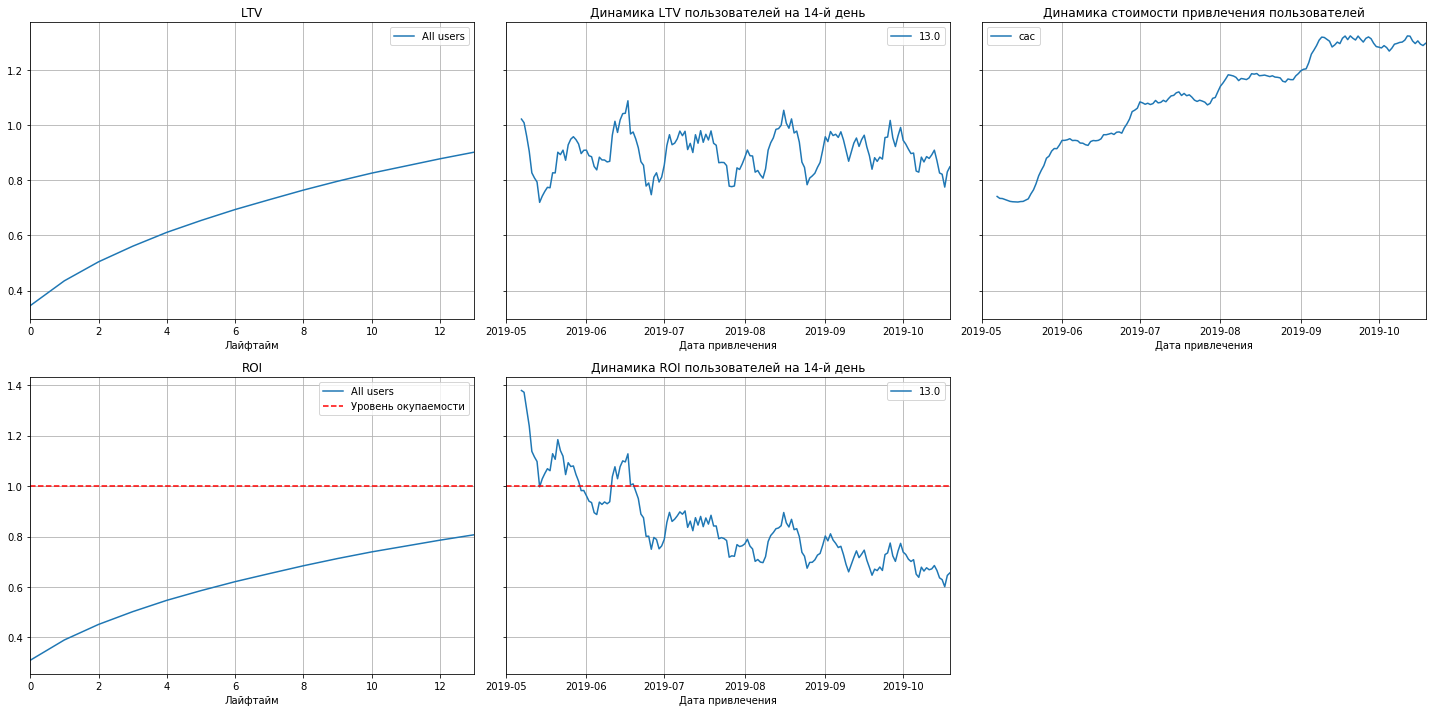

In [41]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=7)

Из полученных графиков мы можем сделать следующие выводы :
- Реклама действительно не окупается, ROI в конце двух недель чуть выше 80%
- На динамике CAC мы можем в очередной раз увидеть рост стоимоти привлечения клиента, что влияет на окупаемость рекламы
- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.
Начнем анализ окупаемости с разбивки пользователей по устройствам первого посещения, для это вызовем функцию get_ltv, дополнив параметр dimensions столбцом `device`.

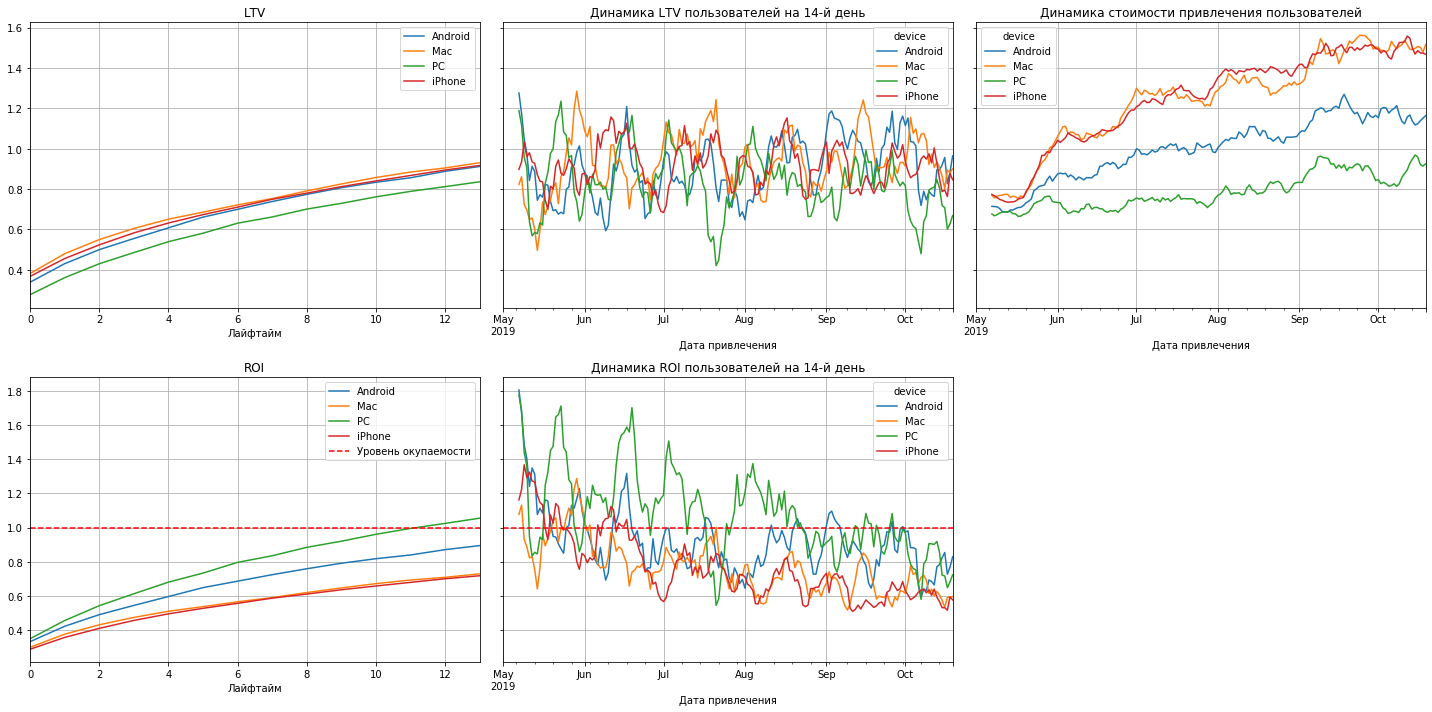

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=7)

Здесь тоже все не очень хорошо однако мы можем увидеть, что пользователи PC выходят в окупаемость в отличии от остальных, для того чтобы оценить возможные проблемы с окупаемостью от устройства входа в приложение, для этого оценим пользователей нашего приложения в разбивке по устройствам, для этого вызовем наши функции get_conversion, get_retention, оценим конверсию пользователей данных устройств и их удержание. Это позволит нам оценить являются ли какие-нибуть платформы убыточными для нашей компании.

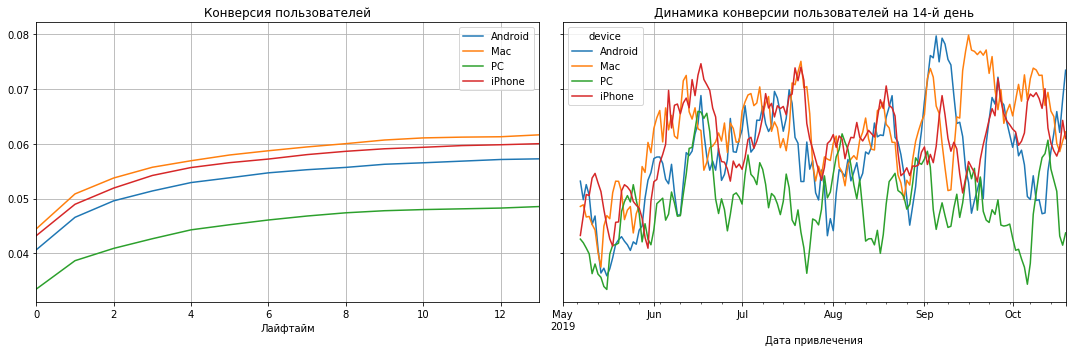

In [43]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_conversion(conversion_grouped, conversion_history, 14, window=7)

Судя по конверсии все убыточные платформы имеют конверсию даже выше чем у пользователей использующих PC, соответсвенно дело не в конверсии, оценим удержание клиентов с различных устройств возможно дело в этом.

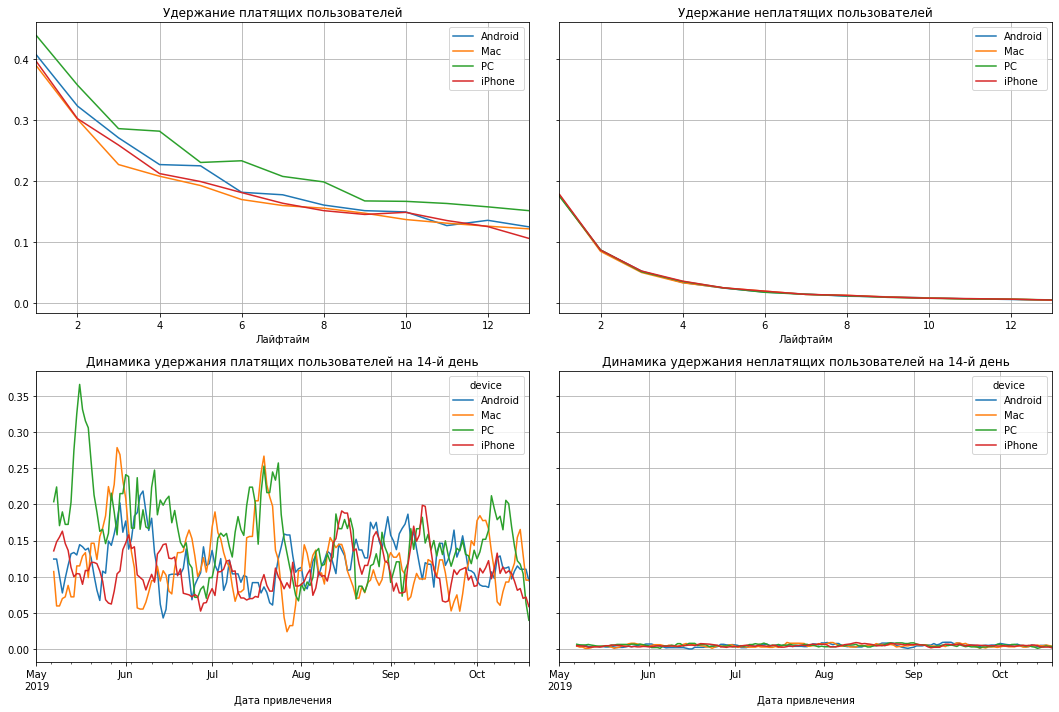

In [44]:
retention_raw, retention_grouped, retention_history =get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_retention(retention_grouped, retention_history, 14, window=7)

Удержание пользователей с различных устройств, стабильно для всех устройств и нет большого разрыва в удержании пользователей, следовательно убытки компании не зависят от того какие устройства используют пользоватли. Убытки компании не зависят от того какие устройства используют пользователи, ознакомимся со следующим параметром, то из какой страны привлечены пользователи.

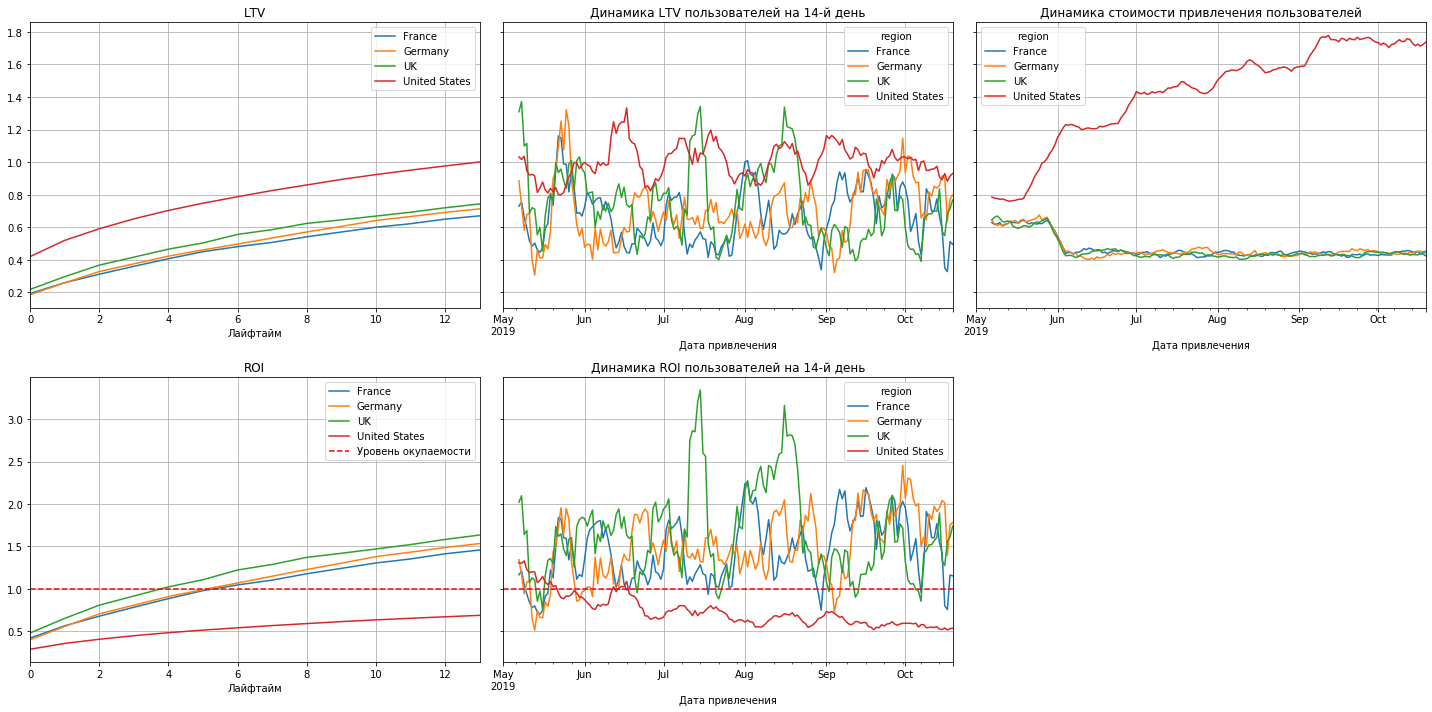

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=7)

Здесь мы можем увидеть следующую картину:
- Реклама окупается во всех регионах кроме США.
- Качество LTV пользователей в США выше чем в других регионах
- Во всех регионах кроме США мы можем наблюдать падения стоимости привлечения клиента, в США мы можем наблюдать резкий рост данного параметра

Из данных графиков мы можем увидеть что убытки компании приносят пользователи из США стоимость их привлечения высока, и реклама не окупается, проверим конверсию регионов и посмотрим возможно что несмотря на стоимость привлечения пользователей из США возможно там мало пользователей которые что-либо покупают у нас в приложении.

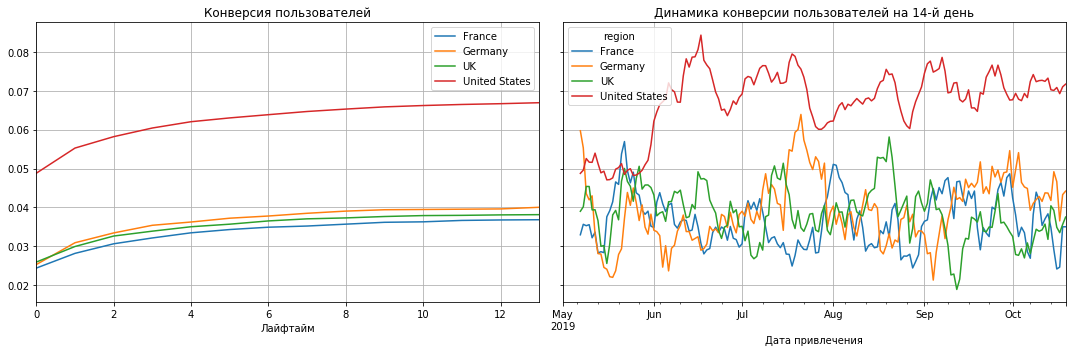

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_conversion(conversion_grouped, conversion_history, 14, window=7)

Из графика конверсии мы можем наблюдать, что конверсия пользователей из США на порядок выше чем у пользователей из других стран, оценим удержания пользователей из других стран, возможно причина в удержании.

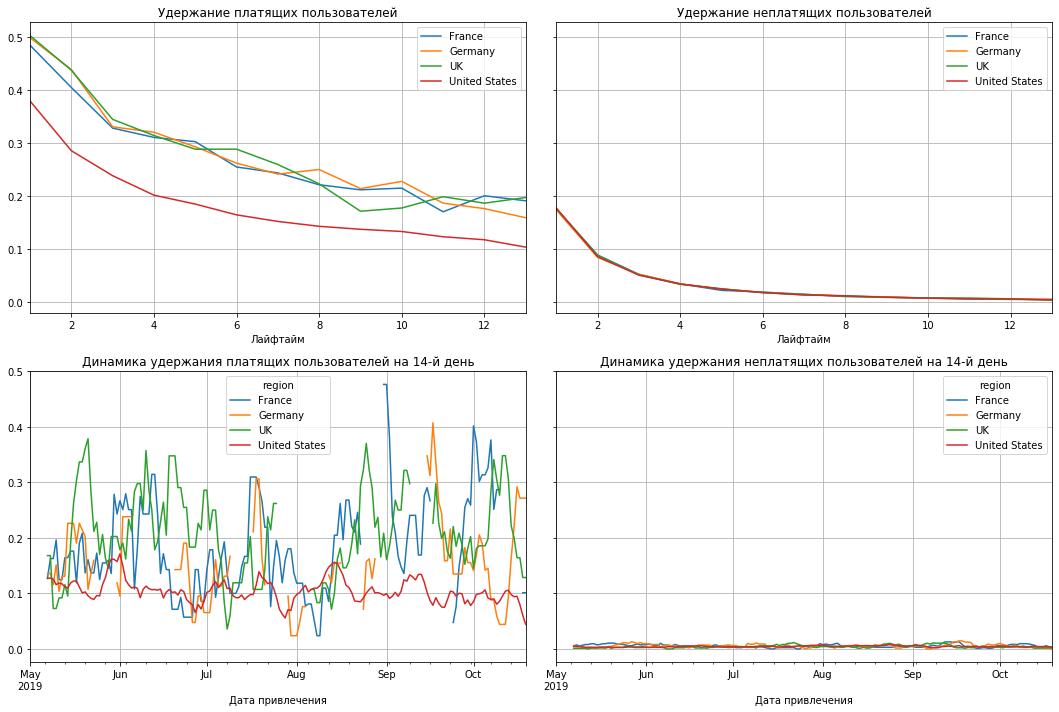

In [47]:
retention_raw, retention_grouped, retention_history =get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_retention(retention_grouped, retention_history, 14, window=7)

Как мы можем увидеть из графиков удержания, пользователи из США стабильно плохо удерживаются.  Для платящих пользователей из США удержание приблизительно на 10% хуже чем ддля других регионов. Следовательно не смотря на неплохую конверсию, пользователи из США обходятся компании намного дороже других, а удерживаются хуже, это говорит о том что это одна из причин убытков нашей компании. Рассмотрим следующий параметр разбивки пользователей, разделим пользователей на каналы их привлечения.

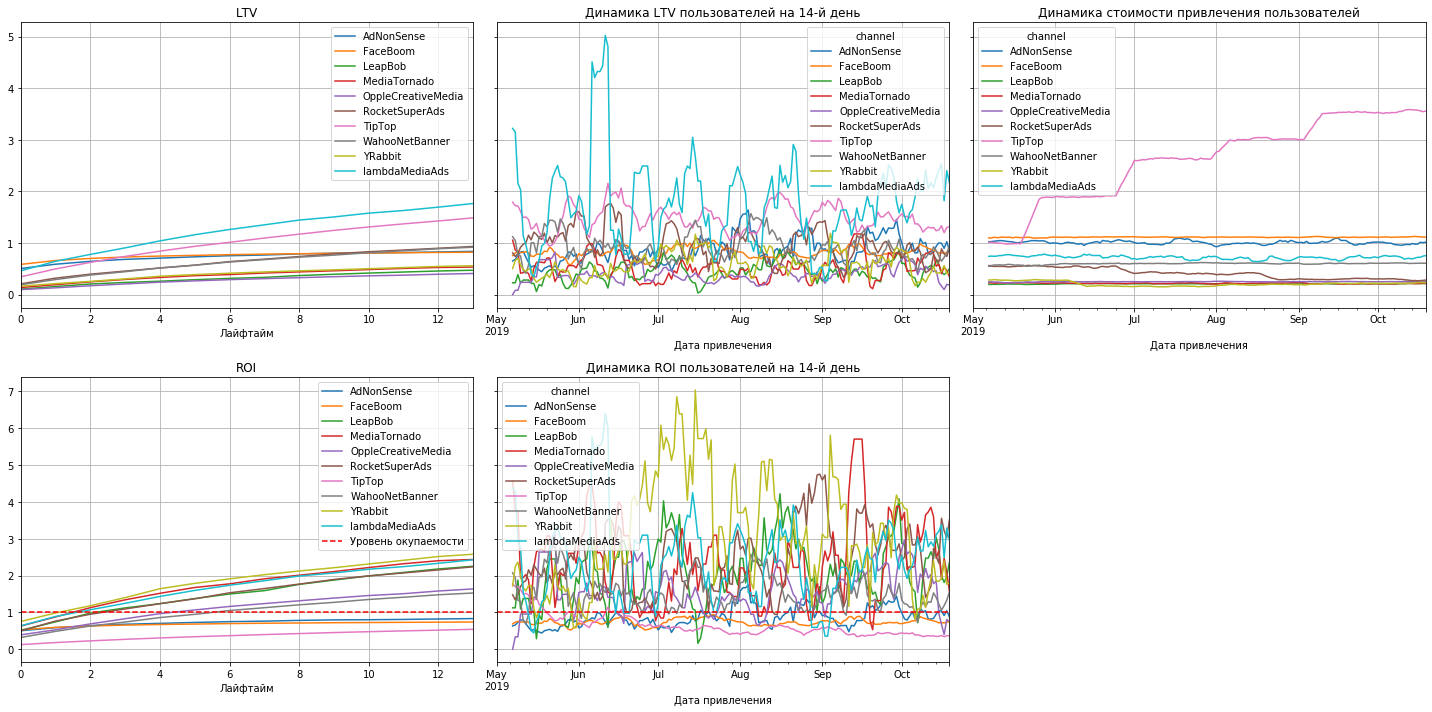

In [48]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history  = get_ltv(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=7)

Как мы можем увидеть из графиков:
- Рекламные каналы AdNonSense, FaceBoom, TipTop не окупаются
- Стоимость привлечения клиентов в TipTop на порядок выше чем в других

Произведем оценку конверсиии и удержания пользователей из данных рекламных источников.

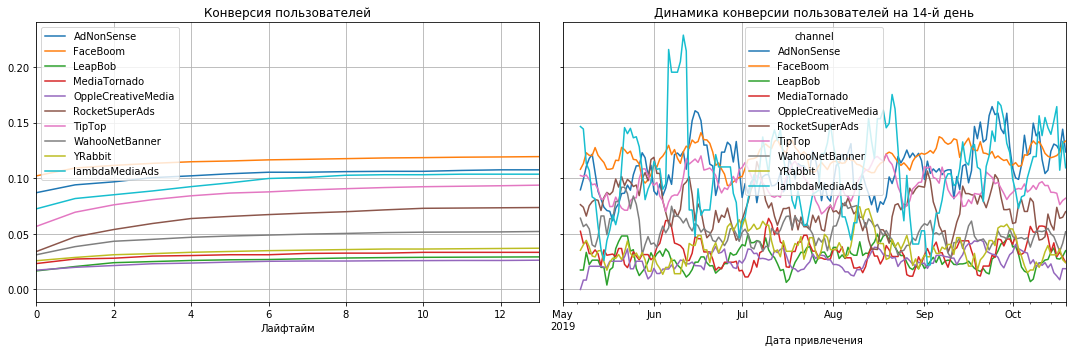

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_conversion(conversion_grouped, conversion_history, 14, window=7)

Как мы можем увидеть что конверсия пользователей убыточных каналов выше большинства других, AdNonSense, FaceBoom, и одни из самых лучших по конверсии, а TipTop имеет среднюю конверсию. Оценим удержание клиентов из данных источников.

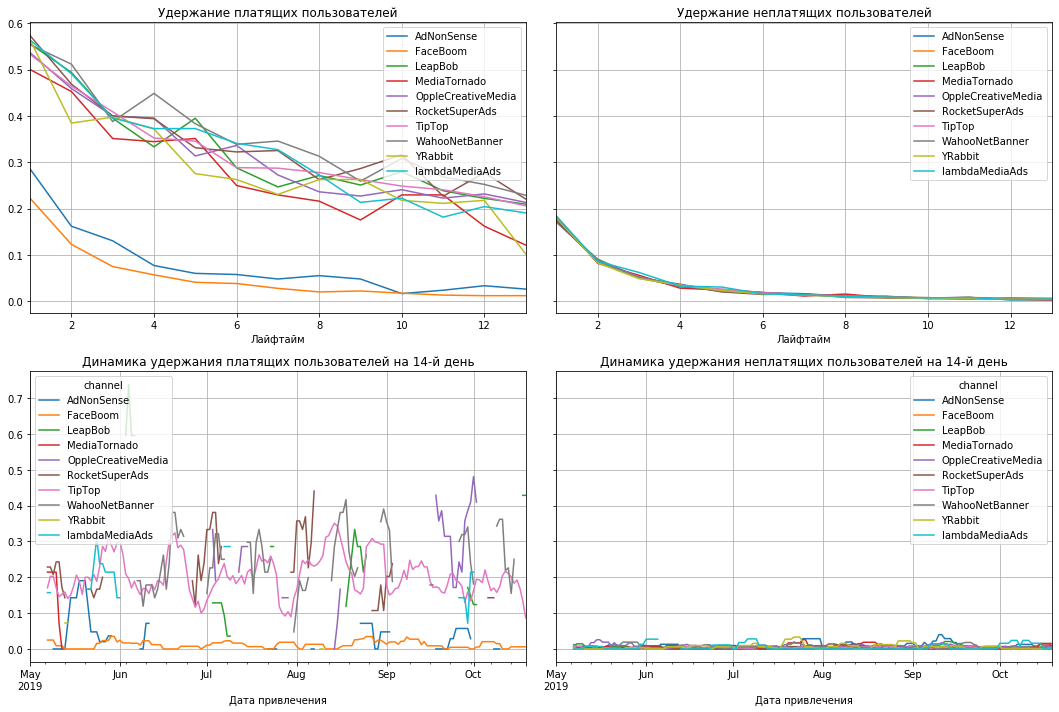

In [50]:
retention_raw, retention_grouped, retention_history =get_retention(
    ltv_profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_retention(retention_grouped, retention_history, 14, window=7)

Как мы  можем увидеть из графиков удержания, что пользователи из убыточных источников AdNonSense, FaceBoom плохо удерживаются. На приблизительно 30% хуже чем у остальных источников. TipTop не  смотря на дороговизну привлечения пользователей имеет не плохую конверсию и не плохое удержание. Для нашей компании убыточными являются следующие источники AdNonSense и FaceBoom, от них следует отказаться, а TipTop имеет хороший потенциал, но рекламному отделу следует провести переговоры с данной компанией о стоимоти привлечения клиентов, если уменьшить стоимость привлечения клиентов не удасться уменьшить и она продолжит расти то от данного источника следует отказаться.

# Вывод по разделу

В ходе данного раздела нами были выполнены следующие действия:

С помощью LTV и ROI:
- Проанализирована общая окупаемость рекламы;
- Проанализирована окупаемость рекламы с разбивкой по устройствам;
- Проанализирована окупаемость рекламы с разбивкой по странам;
- Проанализирована окупаемость рекламы с разбивкой по рекламным каналам.

А так же найдены ответы на следующие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучить конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Мы постороили посредством функции визуализации  графики для общей окупаемости рекламной компании. Из полученных графиков мы  сделали следующие выводы :
- Реклама действительно не окупается, ROI в конце двух недель чуть выше 80%
- На динамике CAC мы можем в очередной раз увидеть рост стоимоти привлечения клиента, что влияет на окупаемость рекламы
- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Чтобы разобраться в причинах, мы изучили все доступные характеристики пользователей — страны, источнику привлечения и устройству первого посещения.

Первым мы провели анализ разбивки пользователей по устройствам мы увидели, что пользователи PC выходят в окупаемость в отличии от остальных, для того чтобы оценить возможные проблемы с окупаемостью от устройства входа в приложение, для этого оценим пользователей нашего приложения в разбивке по устройствам, для этого мы изучили конверсию и графики удержания полльзователей по данной разбивки. В результате по данному параметру мы сделали следующие выводы, что пользователи PC не смотря на низкую конверсию являются наиболее окупаемыми для фирмы и хорошо удерживаются, а пользователии Mac и Iphone, не окупаются не смотря на хорошую конверсию, но при этом имеют плохое удержание. 

После анализа пользовательских устройств мы перешли к анализу разбивки пользователей по странам. В результате данного анализа мы выявили что убыточной для нашей компании является пользователи из США, стоимость привлечения даных пользователей очень высока, но удержание очень плохое, конверсия не имеет достаточного уровня чтобы нивилировать данные переменные и нашей компании следует произвести пересмотрение рекламных компаний   в данной стране.

Следующим мы проанализировали пользователей при разбивке по источникам привлечения, в резулььтате анализа мы выявили что для нашей компании убыточными являются следующие компании AdNonSense и FaceBoom, а компания TipTop имеет потенциал окупаемости. Компании AdNonSense, FaceBoom не окупают средства вложенные в рекламу  через них и не смотря на хороший уровень конверсии имеют очень низкий уровень удержания пользователей. Компания TipTop не смотря на то что не окупает инвестиции имеет хороший показатель конверсии и удержания, в случае если удастся  снизить стоимость привлечения клиентов то данная компания окупится, в случае если рекламному отделу не удастся снизить стоимость от услуг данной компании следует отказаться.

## Итоговый вывод
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

В ходе первого подраздела первого раздела мы произвели первичное ознакомление с данными в имеющихся таблицах, а также ознакомились с общей информацией  о имеющихся таблицах, на основании данного ознакомления нами была составлена таблица первичной предобработки имеющихся таблиц:

| Название таблицы    |Наименование столбцов     | Необходимая первичная  предобработка |
| --------------- |:-----------------------------------------------------------:|------------------------------------:|
| visits           |User Id, Region, Device, Channel, Session Start, Session End | Превести наименования к змеиному регистру|
| visits        |Session Start, Session End     | Произвести замену типа данных на datetime |
|orders        |User Id, Event Dt, Revenue       | Превести наименования к змеиному регистру |
|orders        |Event Dt        | Произвести замену типа данных на datetime |
|costs        |dt, Channel, costs         | Превести наименования к змеиному регистру|
|costs        |dt        | Произвести замену типа данных на datetime |

В ходе второго подраздела первого раздела нами была произведена первичная предобработка исходных таблиц на основе таблицы необходимой первичной предобработки, для выполнения поставленных задач нами были написаны два цикла, цикл позволивший превести все строки к змеиному регистру и цикл производящий замену типа данных с object(str) на datetime в столбцах требующих данной замены.
В третьем подразделе первого раздела нами было произведено более подробное ознакомление с данными содержащимися в наших таблицах с целью проверки данных столбцов на неявные дубликаты и таблиц на наличие полных дубликатов. В ходе данного ознакомления в исходных данных нами небыло выявлено неявных дубликатов, а так же полных дубликатов в наших таблицах.
В ходе второго раздела нами были созданы функции для расчета и последующего анализа следующих метрик, коэффициента удержания, конверсии, LTV и ROI, а так же созданы функции для визуализации полученных данных:
1. Функция get_profiles - функция для создания пользовательских профилей
2. Функция get_retention - функция для расчёта удержания
3. Функция get_conversion - функция для расчёта конверсии
4. Функция get_ltv - функция для расчёта LTV и ROI
5. Функция plot_retention - функция для визуализации удержания
6. Функция plot_conversion - функция для визуализации конверсии
7. Функция plot_ltv_roi - функция для визуализации LTV и ROI
А так же нами была создана фильтрующая функция filter_data, для уменьшения возможных шумов на графиках, основывающаяся на применении скользящего среднего, что позволит сгладить графики при этом не сильно исказив имеющиеся данные.

В ходе третьего раздела мы исследовали имеющиеся у нас данные воспользовавщись функциями описанными во втором разделе, а так же дали ответы на следующие вопросы:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Для работы с нашими данными и поиска ответов на интересующие нас вопросы мы создали пользовательские профили посредством функции get_profiles, результат работы данной функции сохранили в переменную profiles. После чего определили минимальную и максимальную даты привлечения пользователей.
Ответом на вопросы `Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?`. Исходя из имющихся данных ответом на вопрос `Из каких стран приходят посетители?` является следующий список стран:
- Франция
- Германия
- Великобритания
- США

А ответом на вопрос `Какие страны дают больше всего платящих пользователей?` будет следующее наибольшее число платящих пользователей приходят из США, а наименьшее за весь исследуемый период принесла Франция. Конверсию по странам можно распределить в следующем порядке от большей к меньшей США, Германия, Великобритания, Франция. Если анализировать динамику конверсии пользователей, то можем наблюдать что Франция не всегда была в оутсайдерах по конверсии, а переодически превышала конверсию Германии и Британии а в второй половине мая даже была на первом месте по конверсии.

Ответив на первый интересующий нас вопрос мы перешли к следующему, а именно к вопросу `Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?` Исходя из полученных данных ответом на вопрос `Какими устройствами они пользуются?` является следующий список устройств:
- Андроид
- Мак
- Компьютер
- Айфон

А ответом на вопрос `С каких устройств чаще всего заходят платящие пользователи` будет следующим наибольшее число платящих пользователей пользуются Mac, а менее всего пользователей используют PC. Конверсию по устройствам можно распределить в следующем порядке от большей к наименьшей Mac, Iphone, Android, PC. Если анализировать динамику конверсии пользователей, то можем наблюдать следующую картину платящие пользователи использующие PC никогда не вырывались вперед по пользовательской конверсии, Iphone имел наибольшую конверсию с июня по июль, а android в первой половине сентября, Mac же сильно вырывался по уровню конверсии  с сентября по октябрь.
Следующим вопросм на который мы ответили был вопрос : `По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?`. Исходя из полученных данных ответом на вопрос `По каким рекламным каналам шло привлечение пользователей?` является следующий список рекламных каналов:
- AdNonSense 
- FaceBoom 
- LeapBob 
- MediaTornado 
- OppleCreativeMedia 
- RocketSuperAds 
- TipTop 
- WahooNetBanner 
- YRabbit 
- lambdaMediaAds

А ответом на вопрос `Какие каналы приносят больше всего платящих пользователей?` будет следующим наибольшее число платящих пользователей привлек рекламный канал `FaceBoom`, а наименьшее число пользователей пришло из рекламного канала `OppleCreativeMedia`.

В четвёртом разделе нами было произведено маркетинговое исследования приложения в ходе которого мы ответили на следующие вопросы:
- Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам. Визуализировать изменения метрик во времени.
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?
Исследуя имеющуюся информацию для ответа на интересующие нас вопросы мы рассчитали общую сумму затрат на рекламную компанию, она равна 105497.3, а так же затраты на каждый рекламный канал за весь исследуемый период, исходя из полученных данных самым дешёвым рекламным каналом был YRabbit на данный рекламный канал компания потратила 944.22 , а самым дорогим TipTop на него компания потратила 54751.30. Оценив распределения затрат по времени мы смогли увидеть тенденцию роста затрат компании на рекламную компанию из месяца в месяц расходы компании, на рекламу росли, самый затратный период пришелся на конец сентября.

Далее нами был рассмотрен следующий интересующий нас вопрос а именно :
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Для ответа на данный вопрос мы воспользовались имеющимися у нас пользовательскими профилями и расчитали такой бизнес параметр как CAC. Исходя из данного параметра мы смогли узнать сколько стоило привлечение одного пользователя всреднем из всех рекламных компаний, а так же сколько стоило привлечение одного пользователя в среднем за все время. Для анализа данного параметра мы исключили из пользовательских профилей пользователей пришедших в приложение самих, тоесть исключили канал organic.

Далее мы узнали что средняя стоимость привлечения одного пользователя стоила компании около `1.13 $` так же мы рассчитали диапазон разброса стоимости одного пользователя по рекламным компаниям колеблется от` 0.2 $` до `2.8 $` за одного пользователя, Для оценки как менялся  данный параметр по времени мы построили графики динамики изменения параметра CAC по времени.

Исходя из полученных графиков динамики CAC мы увидели скачек средней стоимости привлечения одного пользователя для компаний с 2 половины мая, на данную стоимость влияет 1 из рекламных компаний, а именно рекламная компания TipTop, если для остальных компаний мы можем наблюдать тенденцию колебания стоимости привлечения одного клиента в пределах средней стоимости привлечения клиента, то стоимость привлечения пользователя в данной  компании увеличивалось каждый месяц, скорее всего чрезмерный рост стоимости привлечения клиентов и является причиной убытков компании. 

В ходе пятого раздела нами были выполнены следующие действия:

С помощью LTV и ROI:
- Проанализирована общая окупаемость рекламы;
- Проанализирована окупаемость рекламы с разбивкой по устройствам;
- Проанализирована окупаемость рекламы с разбивкой по странам;
- Проанализирована окупаемость рекламы с разбивкой по рекламным каналам.

А так же найдены ответы на следующие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучить конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Мы постороили посредством функции визуализации  графики для общей окупаемости рекламной компании. Из полученных графиков мы  сделали следующие выводы :
- Реклама действительно не окупается, ROI в конце двух недель чуть выше 80%
- На динамике CAC мы можем в очередной раз увидеть рост стоимоти привлечения клиента, что влияет на окупаемость рекламы
- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Чтобы разобраться в причинах, мы изучили все доступные характеристики пользователей — страны, источнику привлечения и устройству первого посещения.

Первым мы провели анализ разбивки пользователей по устройствам мы увидели, что пользователи PC выходят в окупаемость в отличии от остальных, для того чтобы оценить возможные проблемы с окупаемостью от устройства входа в приложение, для этого оценим пользователей нашего приложения в разбивке по устройствам, для этого мы изучили конверсию и графики удержания полльзователей по данной разбивки. В результате по данному параметру мы сделали следующие выводы, что пользователи PC не смотря на низкую конверсию являются наиболее окупаемыми для фирмы и хорошо удерживаются, а пользователии Mac и Iphone, не окупаются не смотря на хорошую конверсию, но при этом имеют плохое удержание. 

После анализа пользовательских устройств мы перешли к анализу разбивки пользователей по странам. В результате данного анализа мы выявили что убыточной для нашей компании является пользователи из США, стоимость привлечения даных пользователей очень высока, но удержание очень плохое, конверсия не имеет достаточного уровня чтобы нивилировать данные переменные и нашей компании следует произвести пересмотрение рекламных компаний   в данной стране.

Следующим мы проанализировали пользователей при разбивке по источникам привлечения, в резулььтате анализа мы выявили что для нашей компании убыточными являются следующие компании AdNonSense и FaceBoom, а компания TipTop имеет потенциал окупаемости. Компании AdNonSense, FaceBoom не окупают средства вложенные в рекламу  через них и не смотря на хороший уровень конверсии имеют очень низкий уровень удержания пользователей. Компания TipTop не смотря на то что не окупает инвестиции имеет хороший показатель конверсии и удержания, в случае если удастся  снизить стоимость привлечения клиентов то данная компания окупится, в случае если рекламному отделу не удастся снизить стоимость от услуг данной компании следует отказаться.